# Polar Box-Muller Transform

The basic Box-Muller transform generates random variables $x_1$ and $x_2$ drawn from the standard normal distribution by drawing two variables $y_1$ and $y_2$ from the uniform distribution on $(0,1)$ and letting
\begin{equation}
\begin{array}{rcl}
x_1 & = & \displaystyle \sqrt{-2 \log y_1} \cos (2 \pi y_2), \\[8pt]
x_2 & = & \displaystyle \sqrt{-2 \log y_1} \sin (2 \pi y_2).
\end{array}
\end{equation}

The polar Box--Muller transform first generates uniformly distributed random numbers $z_1, z_2 \in (-1,1)$ by letting $z_i = 2 y_i -1$ for variables $y_i$ uniformly distributed in $(0,1)$, until $s = z_1^2 + z_2^2 < 1$. We then set
\begin{equation}
\begin{array}{rcl}
\cos \theta & = & \displaystyle \frac{z_1}{\sqrt{s}}, \\[8pt]
\sin \theta & = & \displaystyle \frac{z_2}{\sqrt{s}}.
\end{array}
\end{equation}
The probability $p(s \leq \hat{s})$ is the area of the circle with radius $\sqrt{\hat{s}}$, which is $\pi \hat{s}$, divided by the area of the unit circle which is $\pi$. Therefore $p(s \leq \hat{s}) = \hat{s}$, and $s$ follows a uniform distribution on $(0,1)$. Therefore, $s$ can be used to generate a random variable for the radius. To summarize,
\begin{equation}
\begin{array}{rcl}
x_1 & = & \displaystyle \sqrt{-2 \log s} \frac{z_1}{\sqrt{s}} = z_1 \sqrt{ \frac{-2 \log s}{s} }, \\[8pt]
x_2 & = & \displaystyle \sqrt{-2 \log s} \frac{z_2}{\sqrt{s}} = z_2 \sqrt{ \frac{-2 \log s}{s} }
\end{array}
\end{equation}
follow the required distribution. Another way of viewing this technique is that a random point $(z_1, z_2)$ within the unit circle is mapped to the point $(z_1/\sqrt{s}, z_2/\sqrt{s})$ on the unit circle. This point is then multiplied by a radius following the required distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def BoxMuller(N):
  X = np.zeros((N,2))
  for n in range(0,N):
    s =1
    # Generate random number within the unit circle.
    while s >= 1:
      # Draw two samples from the uniform distribution on (-1,1).
      z1 = 2.0 * np.random.uniform() - 1.0
      z2 = 2.0 * np.random.uniform() - 1.0
      # While loop ends, if the point is within the unit circle.
      s = z1 * z1 + z2 * z2
    # Calculate radius.
    s = np.sqrt( (-2.0* np.log(s)) / s)
    X[n,0] = z1 * s
    X[n,1] = z2 *s
  return X

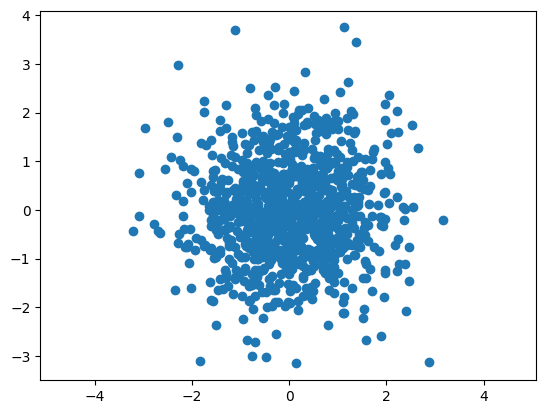

In [3]:
# Number of samples to be drawn.
N = 1000
X = BoxMuller(N)
# Scatterplot.
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.show()